# Basic Data Visualization in Python

Data Visualization is one of the most important skills to build when learning python. Plots, graphs, and charts can take a table of numbers and make everything easy to interpret. This tutorial will go over using the MatPlotLib library to visualize any dataset.

In [11]:
#import the libraries and modules you need 
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
!conda install -c anaconda xlrd --yes 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\KiraGurganus\Anaconda3

  added / updated specs: 
    - xlrd


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    qt-5.9.7                   |   vc14h73c81de_0        92.3 MB  anaconda

The following NEW packages will be INSTALLED:

    conda-package-handling: 1.3.11-py37_0        anaconda

The following packages will be UPDATED:

    ca-certificates:        2018.03.07-0                  --> 2018.03.07-0         anaconda
    certifi:                2018.11.29-py37_0             --> 2018.11.29-py37_0    anaconda
    conda:                  4.5.12-py37_0                 --> 4.7.12-py37_0        anaconda
    openssl:                1.1.1a-he774522_0             --> 1.1.1a-he774522_0    anaconda
    qt:                     5.9.7-vc14h73c81de_0          --> 5.9.7-vc14h73c81de_0 anaconda [vc14]
    xlrd:



==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



qt-5.9.7             | 92.3 MB   |            |   0% 

PermissionError(13, 'The process cannot access the file because it is being used by another process')




We will be working with a sample dataset of immigration to Canada.

### Pre-work: setting up the dataset for visualizations

In [12]:
#read the data into a pandas dataframe
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Now we will check to make sure our data was loaded correctly

In [5]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


So we can see that our data has loaded correctly, but we want to make some changes. We will use the code in the following cell to drop several columns & rename a few others.

In [13]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)
df_can.head(2)

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603


In [14]:
#now we will rename columns
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

Now that everything is properly labeled and we have only the columns we want in our dataframe, we can add a new column with the total number of immigrants to Canada for each country.

In [15]:
df_can['Total'] = df_can.sum(axis=1)

With our dataset ready for analysis, we can change the index of the dataframe to be set to the country, rather than the positional number we saw above. This will allow us to more easily call a specific row of data.

In [16]:
df_can.set_index('Country', inplace=True)
# tip: The opposite of set is reset. So to reset the index, we can use df_can.reset_index()

In [13]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


### Line Graphs

The most basic of visualizations are line graphs, and that is where we will start. Lets practice by looking at the immigration from Haiti to Canada for the years 1980 - 2013. To make this easier, we will first place the years we want to look at in a list.

In [17]:
#convert to string
df_can.columns = list(map(str, df_can.columns))

In [18]:
years = list(map(str, range(1980, 2014)))

In [19]:
haiti = df_can.loc['Haiti', years] # passing in years 1980 - 2013 to exclude the 'total' column
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

Now we will create a line plot using MatPlotLib's scripting layer: pyplot

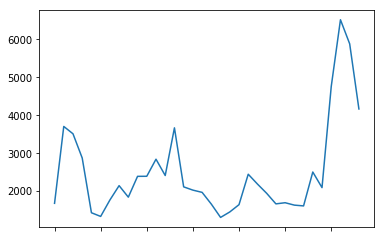

In [20]:
haiti.plot()

We can add labels to the graph as follows. If there are irregularities in the graph, such as the spike we see in 2010, we can put in labels to increase clarity of the graph.

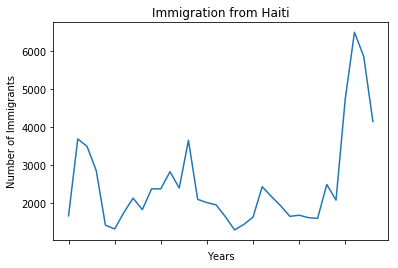

In [21]:
haiti.plot()
plt.title('Immigration from Haiti')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

### Box Plots

Box plots display the five-number summary of a set of data. The five-number summary is the minimum, first quartile, median, third quartile, and maximum. In a box plot, we draw a box from the first quartile to the third quartile. A vertical line goes through the box at the median. The whiskers go from each quartile to the minimum or maximum. 

Creating a box plot is quite simple. We use MatPlotLib's ".plot()" function, with the addition of a parameter for what kind of plot we want.

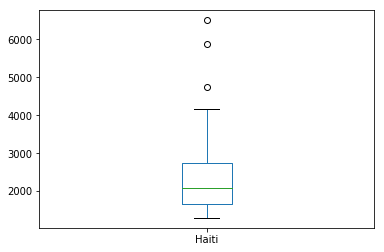

In [33]:
haiti.plot(kind="box")

Now we will add some labels

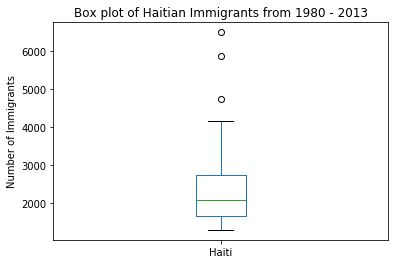

In [28]:
haiti.plot(kind="box")
plt.title('Box plot of Haitian Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.show()

### Bar Charts

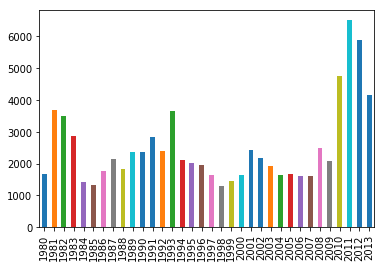

In [39]:
haiti.plot(kind="bar")

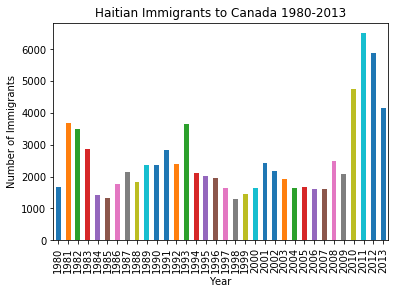

In [38]:
haiti.plot(kind="bar")

plt.title("Haitian Immigrants to Canada 1980-2013")
plt.xlabel("Year")
plt.ylabel("Number of Immigrants")

plt.show()